<center>
    <h2>CS 412 Introduction to Machine Learning, Fall 2018</h2>
    <h2>University of Illinois at Chicago</h2>
    <br>
    <h3>Homework 5: Mini Project &ndash; Extra Credit</h3>
</center>

---
<br>

# Empathy Classification

Classification of people into empathetic and non-empathetic using the Young People Survey dataset.

---

This is a mini-project created as part of the **CS 412 - Introduction to Machine Learning** course, taught by *Professor Elena Zheleva*, at the University of Illinois at Chicago.

### Problem Statement

You are working for a non-profit that is recruiting student volunteers to help with Alzheimer's patients. You have been tasked with predicting how suitable a person is for this task by predicting how empathetic he or she is. Using the Young People Survey dataset (https://www.kaggle.com/miroslavsabo/young-people-survey/), predict a person's "Empathy" as either "very empathetic" (answers 4 and 5) or "not very empathetic" (answers 1, 2, and 3). You can use any of the other attributes in the dataset to make this prediction; however, you should not handpick the predictive features but let an algorithm select them.

---

### Approach

The program uses Python packages such as `scikit-learn`, `pandas`, and `numpy`.

Scikit-learn was chosen because it has a good collection of machine learning algorithms that were taught to us in the class, and offers easy APIs for creating machine learning workflows using Pipelines. Using a combination of the above packages, a machine learning workflow was created with the following steps

- binarization of dependent variable
- splitting into train and test set
- missing value treatment
- encoding categorical variables
- feature scaling
- feature selection
- training models with K-fold cross-validation
- scoring the best model on the test set

## Step 0: Setup

Import the required packages and set important parameters

In [1]:
import numpy
import pandas

from main import EmpathyClassification
from pylab import *

# Parameters

dataFile = 'data/responses.csv'         # Path to the dataset
outputFile = 'data/bestModel.pkl'       # Path where trained model will be dumped
testSetOutputFile='data/testSet.csv'    # Path where the test set will be created (after splitting the dataset)
randomSeed=42                           # Seed to set for the random number generator to get consistent results across runs
testSetSize=0.2                         # Percentage of samples that will be held out from the dataset for testing

# Create instance of EmpathyClassification
classification = EmpathyClassification(dataFile=dataFile, outputFile=outputFile, testSetOutputFile=testSetOutputFile,
                                       randomSeed=randomSeed, testSetSize=testSetSize)

## Step 1: Load Dataset

The supplied dataset contained **1107 samples** with **150 features**, including the dependent variable (Empathy), out of which 11 were categorical, and most of the remaining features were ordinal – ranging from 1 (lowest) to 5 (highest). Many of these features had missing values, including 5 rows with missing values for the “Empathy” feature.

In [2]:
# Load dataset
Xall, Yall = classification.loadData()

# Print a summary of the data
display(Xall.describe(include='all'))
display(Yall.describe())

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
count,1002.000000,1003.000000,1001.000000,1000.000000,1000.000000,998.000000,1004.000000,1002.000000,999.000000,1002.000000,...,998.000000,985.000000,985.000000,999.000000,999,1002,1004,1003,1001,1001
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,2,6,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,female,right handed,secondary school,no,city,block of flats
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,590,901,618,752,703,590
mean,4.735529,3.331007,3.112887,2.290000,2.124000,2.955912,2.762948,3.469062,3.765766,2.362275,...,20.438878,173.515736,66.414213,1.300300,NaN,NaN,NaN,NaN,NaN,NaN
std,0.660665,0.832298,1.173134,1.139824,1.077862,1.249297,1.262063,1.161117,1.183211,1.375355,...,2.833347,10.020913,13.835378,1.013887,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,15.000000,62.000000,41.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,19.000000,167.000000,55.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,20.000000,173.000000,64.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,22.000000,180.000000,75.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN


count    1005.000000
mean        0.661692
std         0.473370
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
dtype: float64

The rows with missing values for **Empathy** were dropped at the time of loading the dataset since this is our target variable which will be predicted by our model. Additionally, the **Empathy** column was binarized to two classes – 0 and 1 – such that, answers 1, 2, and 3 were mapped to 0, and answers 4 and 5 were mapped to 1. The dataset was then split into training and test sets in 80%-20% ratio.

In [3]:
# Split dataset into test and train
Xtrain, Xtest, Ytrain, Ytest = classification.splitTrainAndTestSet(Xall, Yall)

# Write test set to disk for testing the model later
classification.writeTestSet(Xtest, Ytest)

print("Binarized rows of target variable in the train set:\n(showing first 20 rows)\n")
print(Ytrain.head(20))

print("\nTotal number of records in the full dataset: {} responses, {} features".format(len(Xall), len(Xall.columns)))
print("Total number of records in the training set: {} responses, {} features".format(len(Xtrain), len(Xtrain.columns)))
print("Total number of records in the test set: {} responses, {} features".format(len(Xtest), len(Xtest.columns)))

Binarized rows of target variable in the train set:
(showing first 20 rows)

78     1
29     1
280    1
507    1
653    1
951    0
289    1
165    1
763    1
497    1
462    1
65     0
141    0
275    1
956    0
582    0
464    1
669    0
319    1
716    1
dtype: int32

Total number of records in the full dataset: 1005 responses, 149 features
Total number of records in the training set: 804 responses, 149 features
Total number of records in the test set: 201 responses, 149 features


## Step 2: Preprocess the data

The missing values in the independent variables were imputed with the **mode** of the respective feature since the number of missing values were less and the features were either ordinal or categorical.

The categorical features were transformed using **one-hot encoding** with the help of pandas' `get_dummies()` function. One-hot encoding was chosen over label encoding, since the categorical variables were not ordinal in nature, e.g. for “Gender”, the presence or absence of “male” or “female”, using one-hot encoding, makes more sense than saying “male” is superior to “female”, if a label encoder was used.

The next step was to apply **min-max scaling** to all the variables to constrain them in the range of 0 to 1 to account for the difference in scales across features, e.g. values of “Music” feature range between 1 to 5, whereas the values for “Weight” range from 41 to 165.

Next, **feature selection** was done by training a random forest classifier on the train set and then using the feature importance scores to select the most important features. Doing so helps reduce overfitting since duplicate or correlated features get removed by this approach.

In [4]:
# Fit preprocessor
classification.doPreprocessing(Xtrain, Ytrain)

# Apply results of preprocessing
print("Number of features before preprocessing:", Xtrain.shape[1])
Xtrain = classification.applyPreprocessing(Xtrain)
Xtest = classification.applyPreprocessing(Xtest)
print("Number of features after preprocessing:", Xtrain.shape[1])

C:\Users\send2\AppData\Local\conda\conda\envs\cs412\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Number of features before preprocessing: 149
Number of features after preprocessing: 84


After **one-hot encoding**, the number of columns increased from **149 to 172**. Thereafter, **feature selection** step reduced the number of columns to **84** by discarding all the columns whose importance score was less than the mean of all importances.

Let's have a look at the **10 most important** and the **10 least important** features reported by the feature selection step.

Mean of feature importances: 0.005813953488372093


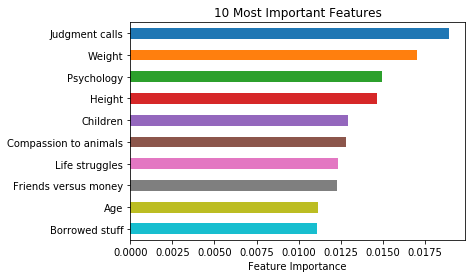

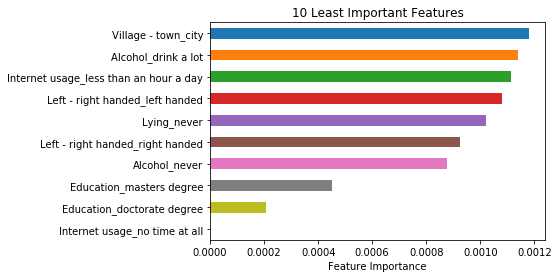

In [5]:
# Extract the column names from the one-hot encoding step
columnNames = classification.preprocessor.named_steps['onehot']._columns

# Extract the feature importances from the feature-selection step
featureImportances = classification.preprocessor.named_steps['feature_selection'].estimator_.feature_importances_

# Create a Series using these values, and sort it
importances = pandas.Series(featureImportances, index=columnNames)
importances.sort_values(ascending=False, inplace=True)

print("Mean of feature importances:", numpy.mean(featureImportances))

# Plot the importances
ax = importances.head(10).plot.barh()
ax.invert_yaxis()
ax.set_xlabel("Feature Importance")
title("10 Most Important Features")
show()

ax = importances.tail(10).plot.barh()
ax.invert_yaxis()
ax.set_xlabel("Feature Importance")
title("10 Least Important Features")
show()

## Step 3: Model selection

Multiple models were trained on the test set using 8 different algorithms:

1. Most-frequent (Baseline) Classifier
2. KNN
3. Logistic Regression
4. Gaussian Naïve Bayes
5. Perceptron
6. Decision Tree
7. Random Forest
8. SVM

Parameter tuning was done using `GridSearchCV` and `StratifiedKFold` cross-validation technique with `K=8` folds, such that each fold sampled about 110 responses. The stratified K-fold technique ensured that the percentage of samples from each class is preserved across folds. Accuracy was chosen as the scoring metric and the cross-validation scores were used to select the best performing model.

In [6]:
# Train classifiers
classification.trainClassifiers(Xtrain, Ytrain)



Training Most-frequent Classifier (Baseline) ...
CV Accuracy: 0.677860696517413
Best parameters: {'strategy': 'most_frequent'}


Training KNN ...
CV Accuracy: 0.7151741293532339
Best parameters: {'n_neighbors': 19}


Training Logistic Regression ...
CV Accuracy: 0.7189054726368159
Best parameters: {'C': 1.0002302850208247, 'solver': 'liblinear'}


Training Gaussian Naive Bayes ...
CV Accuracy: 0.6840796019900498
Best parameters: {}


Training Perceptron ...
CV Accuracy: 0.6990049751243781
Best parameters: {'eta0': 0.30000000000000004, 'max_iter': 30, 'penalty': 'l2'}


Training Decision Tree ...
CV Accuracy: 0.6442786069651741
Best parameters: {'criterion': 'entropy', 'max_depth': 10}


Training Random Forest ...
CV Accuracy: 0.7450248756218906
Best parameters: {'criterion': 'entropy', 'n_estimators': 180}


Training SVM ...
CV Accuracy: 0.7350746268656716
Best parameters: {'C': 0.96, 'gamma': 'scale', 'kernel': 'rbf'}


## Step 4: Results

With an accuracy of **74.5%** on 8-fold cross-validation, **Random Forest** was the best performing model on this dataset, with **SVM** using `RBF` kernel, being the second-best model with an accuracy of **73.5%**. Scoring the **random forest** model on the **test set** gave an accuracy of **68.16%**. In contrast, the most-frequent (**baseline**) classifier scored an accuracy of **59.7%** on the test set.


Results:


,Classifier,Best Parameters,CV Accuracy
0,Most-frequent Classifier (Baseline),{'strategy': 'most_frequent'},0.677861
1,KNN,{'n_neighbors': 19},0.715174
2,Logistic Regression,"{'C': 1.0002302850208247, 'solver': 'liblinear'}",0.718905
3,Gaussian Naive Bayes,{},0.684080
4,Perceptron,"{'eta0': 0.30000000000000004, 'max_iter': 30, ...",0.699005
5,Decision Tree,"{'criterion': 'entropy', 'max_depth': 10}",0.644279
6,Random Forest,"{'criterion': 'entropy', 'n_estimators': 180}",0.745025
7,SVM,"{'C': 0.96, 'gamma': 'scale', 'kernel': 'rbf'}",0.735075


Best performing model: Random Forest
Best performing model saved at: data/bestModel.pkl


Scoring Most-frequent Classifier (Baseline) ...
CV Accuracy was 0.677860696517413
Test Accuracy is 0.5970149253731343


Scoring KNN ...
CV Accuracy was 0.7151741293532339
Test Accuracy is 0.6716417910447762


Scoring Logistic Regression ...
CV Accuracy was 0.7189054726368159
Test Accuracy is 0.7114427860696517


Scoring Gaussian Naive Bayes ...
CV Accuracy was 0.6840796019900498
Test Accuracy is 0.7064676616915423


Scoring Perceptron ...
CV Accuracy was 0.6990049751243781
Test Accuracy is 0.681592039800995


Scoring Decision Tree ...
CV Accuracy was 0.6442786069651741
Test Accuracy is 0.572139303482587


Scoring Random Forest ...
CV Accuracy was 0.7450248756218906
Test Accuracy is 0.681592039800995


Scoring SVM ...
CV Accuracy was 0.7350746268656716
Test Accuracy is 0.6567164179104478

Summary of scores on test set:


,Classifier,CV Accuracy,Test Accuracy
0,Most-frequent Classifier (Baseline),0.677861,0.597015
1,KNN,0.715174,0.671642
2,Logistic Regression,0.718905,0.711443
3,Gaussian Naive Bayes,0.684080,0.706468
4,Perceptron,0.699005,0.681592
5,Decision Tree,0.644279,0.572139
6,Random Forest,0.745025,0.681592
7,SVM,0.735075,0.656716


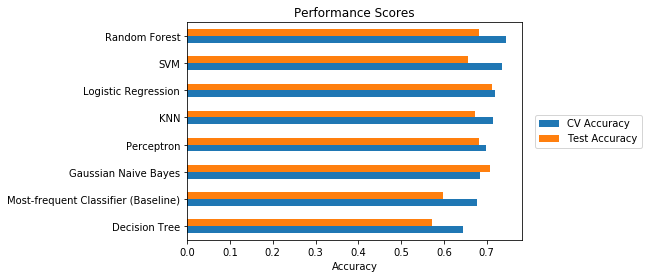


Accuracy of most-frequent (baseline) classifier on test set: 0.5970149253731343
Accuracy of best performing classifier on test set: 0.681592039800995


In [7]:
print("\nResults:")
display(classification.results)

# Dump trained model and preprocessing objects
bestModel = classification.findBestPerformingModel()
classification.saveModel()

# Score models on test set
classification.scoreClassifiers(Xtest, Ytest)
print("\nSummary of scores on test set:")
display(classification.scoreResults)

# Plot performance
results = classification.scoreResults.sort_values('CV Accuracy')
ax = results.plot.barh()
ax.set_yticklabels(results['Classifier'])
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
ax.set_xlabel("Accuracy")
title("Performance Scores")
show()

# Test baseline model on test set
accuracy = classification.gridSearches[0].best_estimator_.score(Xtest, Ytest)
print("\nAccuracy of most-frequent (baseline) classifier on test set:", accuracy)

# Test best model on test set
accuracy = bestModel.score(Xtest, Ytest)
print("Accuracy of best performing classifier on test set:", accuracy)

## (Optional) Testing pre-trained model

If a trained model file generated previously by the program is available, it can be used to score test data without the need of training the model again.

To do this, we first load the test data set, apply the same preprocessing steps that were applied during the training of the model dump, and then score the model on the test data set.

Best performing model loaded from: data/bestModel.pkl


Scoring Most-frequent Classifier (Baseline) ...
CV Accuracy was 0.677860696517413
Test Accuracy is 0.5970149253731343


Scoring KNN ...
CV Accuracy was 0.7151741293532339
Test Accuracy is 0.6716417910447762


Scoring Logistic Regression ...
CV Accuracy was 0.7189054726368159
Test Accuracy is 0.7114427860696517


Scoring Gaussian Naive Bayes ...
CV Accuracy was 0.6840796019900498
Test Accuracy is 0.7064676616915423


Scoring Perceptron ...
CV Accuracy was 0.6990049751243781
Test Accuracy is 0.681592039800995


Scoring Decision Tree ...
CV Accuracy was 0.6442786069651741
Test Accuracy is 0.572139303482587


Scoring Random Forest ...
CV Accuracy was 0.7450248756218906
Test Accuracy is 0.681592039800995


Scoring SVM ...
CV Accuracy was 0.7350746268656716
Test Accuracy is 0.6567164179104478

Summary of scores on test set:


,Classifier,CV Accuracy,Test Accuracy
0,Most-frequent Classifier (Baseline),0.677861,0.597015
1,KNN,0.715174,0.671642
2,Logistic Regression,0.718905,0.711443
3,Gaussian Naive Bayes,0.684080,0.706468
4,Perceptron,0.699005,0.681592
5,Decision Tree,0.644279,0.572139
6,Random Forest,0.745025,0.681592
7,SVM,0.735075,0.656716


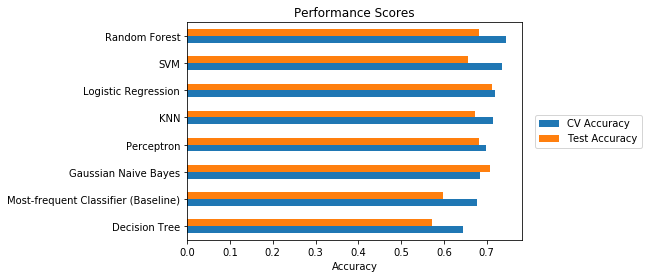


Accuracy of most-frequent (baseline) classifier on test set: 0.5970149253731343
Accuracy of best performing classifier on test set: 0.681592039800995


In [8]:
# Load test set
classification = EmpathyClassification(testSetOutputFile=testSetOutputFile, outputFile=outputFile, randomSeed=randomSeed)
Xtest, Ytest = classification.loadData(testSetOutputFile)

# Load trained model
classification.loadModel()

# Apply preprocessing steps
Xtest = classification.applyPreprocessing(Xtest)

# Score models on test set
classification.scoreClassifiers(Xtest, Ytest)
print("\nSummary of scores on test set:")
display(classification.scoreResults)

# Plot performance
results = classification.scoreResults.sort_values('CV Accuracy')
ax = results.plot.barh()
ax.set_yticklabels(results['Classifier'])
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
ax.set_xlabel("Accuracy")
title("Performance Scores")
show()

# Score baseline model
accuracy = classification.gridSearches[0].best_estimator_.score(Xtest, Ytest)
print("\nAccuracy of most-frequent (baseline) classifier on test set:", accuracy)

# Score best model on test data
accuracy = classification.bestOverallModel.score(Xtest, Ytest)
print("Accuracy of best performing classifier on test set:", accuracy)

## References

- [pandas.get_dummies – pandas 0.23.4 documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
- [python - Impute categorical missing values in scikit-learn - Stack Overflow; answer by sveitser](https://stackoverflow.com/a/25562948/4463881)
- [How to use pd.get_dummies() with the test set – FastML; by Zygmunt Z.](http://fastml.com/how-to-use-pd-dot-get-dummies-with-the-test-set/)
- [Documentation scikit-learn: machine learning in Python](https://scikit-learn.org/stable/documentation.html)
- [Feature selection – scikit-learn 0.20.1 documentation](https://scikit-learn.org/stable/modules/feature_selection.html)
- [Selecting good features – Part III: random Forests; by Ando Saabas;](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
- [Cross validation – scikit-learn 0.20.1 documentation](https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold)
- [Tuning the hyper-parameters of an estimator – scikit-learn 0.20.1 documentation](https://scikit-learn.org/stable/modules/grid_search.html)
- [python - How to put the legend out of the plot - Stack Overflow](https://stackoverflow.com/a/43439132/4463881)